# level 0

In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate              
import seaborn as sns                      
import pandas as pd                         
import numpy as np 

In [2]:
data = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv") 
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [4]:
data.info

<bound method DataFrame.info of                  city  area  rooms  bathroom  parking spaces  floor  \
0           São Paulo    70      2         1               1      7   
1           São Paulo   320      4         4               0     20   
2        Porto Alegre    80      1         1               1      6   
3        Porto Alegre    51      2         1               0      2   
4           São Paulo    25      1         1               0      1   
...               ...   ...    ...       ...             ...    ...   
10687    Porto Alegre    63      2         1               1      5   
10688       São Paulo   285      4         4               4     17   
10689  Rio de Janeiro    70      3         3               0      8   
10690  Rio de Janeiro   120      2         2               2      8   
10691       São Paulo    80      2         1               0      0   

          animal      furniture  hoa (R$)  rent amount (R$)  \
0          acept      furnished      2065           

In [5]:
data.columns 

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [6]:
data.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

## I google searched for requirements of rooms for bachelor is 1-3bhk , mid size families normally have 2-4 members so 2-3bhk is their requirements and large size families have 5-8 members so 3-5bhk is required 

# https://namecensus.com/demographics/minnesota/clay-county/brazil/

## parking compulsory for everyone because avg person in brazil do own at least 1 car accourding to survay

## avg salary in brazil is 8,220 BRL, mini is 1,212 BRL and maximum is 38,200 BRL

https://www.google.com/search?q=What+is+the+average+salary+in+Brazil%3F&ei=eLxhZP3fHODOseMPiamw0Ag&ved=0ahUKEwj9-9Swxfb-AhVgZ2wGHYkUDIoQ4dUDCA8&uact=5&oq=What+is+the+average+salary+in+Brazil%3F&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIFCAAQgAQyBggAEBYQHjIGCAAQFhAeMgYIABAWEB4yBggAEBYQHjIGCAAQFhAeMgYIABAWEB4yBggAEBYQHjIGCAAQFhAeMgYIABAWEB46CggAEEcQ1gQQsANKBAhBGABQzwdYzwdgywtoA3ABeACAAaYBiAGmAZIBAzAuMZgBAKABAqABAcgBCMABAQ&sclient=gws-wiz-serp


## rent range in brazil is 3,920 BRL – 12,080 BRL
## An estimated monthly cost for a family of four in Brazil is 2700dollars which is 13288.59 BRL

## https://www.google.com/search?q=average+rent+paid+in+brazil&oq=average+rent+paid+in+brazil&aqs=chrome..69i57j0i546l4.8898j0j4&sourceid=chrome&ie=UTF-8

# average area of brazil houses people live in is 1288 square feet and converting into meters according to our data is 120 square meters is the avg area that people prefer to live 
# https://www.statista.com/statistics/1052988/average-home-size-selected-countries-worldwide/

# 77% of households are owning a vehicle in Brazil 
https://www.statista.com/statistics/1225260/brazil-motor-vehicle-ownership-household/#:~:text=In%202020%2C%20nearly%20eight%20out,a%20car%20and%20a%20motorcycle.

## link included in research material
https://www.numbeo.com/cost-of-living/country_result.jsp?country=Brazil 

# LEVEL 1

In [7]:
def seprate(data):
    categorical = []
    continuous = []
    for column in data.columns:               
        if data[column].nunique() < 100:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous 
categorical, continuous = seprate(data)       
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [8]:
categorical

['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']

In [9]:
def cat(col): 
    print(f"Unique values in {col} are: {data[col].unique()}") 
    print(f"Mode of {col} is {data[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {data[col].isnull().sum()}")

# city analysis

In [10]:
cat("city")

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in city is 0


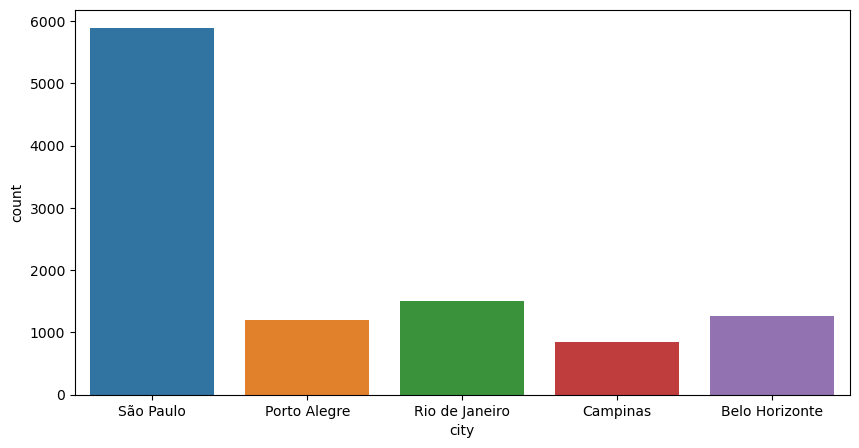

In [11]:
fig ,ax = plt.subplots(figsize = (10,5))
sns.countplot(x = "city", data = data)
plt.show()

## interpretation: maximum numbers of house are from sao paulo followed by rio in are database this two cities are more expensive as per the given case study so we have to find the best suited and budget friendly house for our clients

# room analysis

In [12]:
cat("rooms")

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3
Number of missing values in rooms is 0


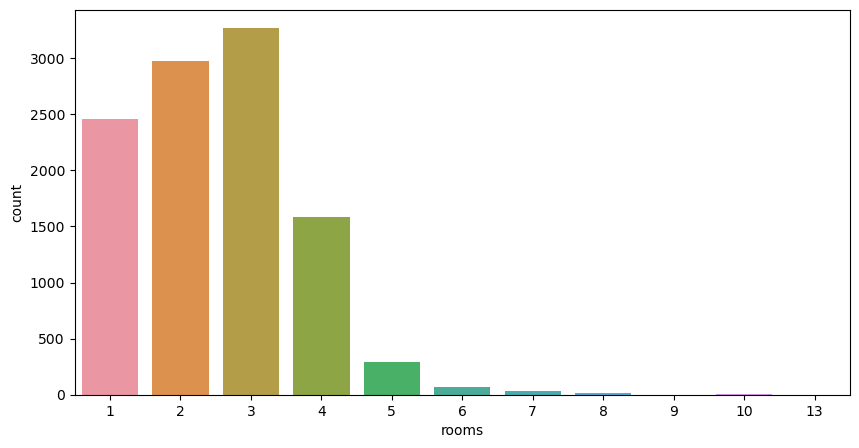

In [13]:
fig ,ax = plt.subplots(figsize = (10,5))
sns.countplot(x = "rooms", data = data)
plt.show()

# interpretation: From 1 to 5bhk we have a good range of house for our clients after 5bhk their are limited houses and those can count under a luxury houses 

# bathroom analysis

In [14]:
cat("bathroom")

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0


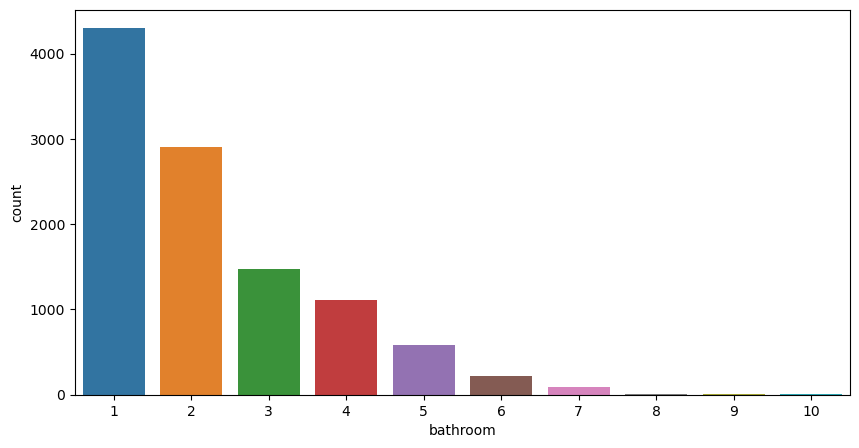

In [15]:
fig ,ax = plt.subplots(figsize = (10,5))
sns.countplot(x = "bathroom", data = data)
plt.show()

# interpretation: Maximum number of houses has at least one bathroom and it goes till 10 baths but it does depend on the family size so in upcomming levels we will compare family size and number of bathroom requirements

# parking spaces analysis

In [16]:
cat("parking spaces")

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


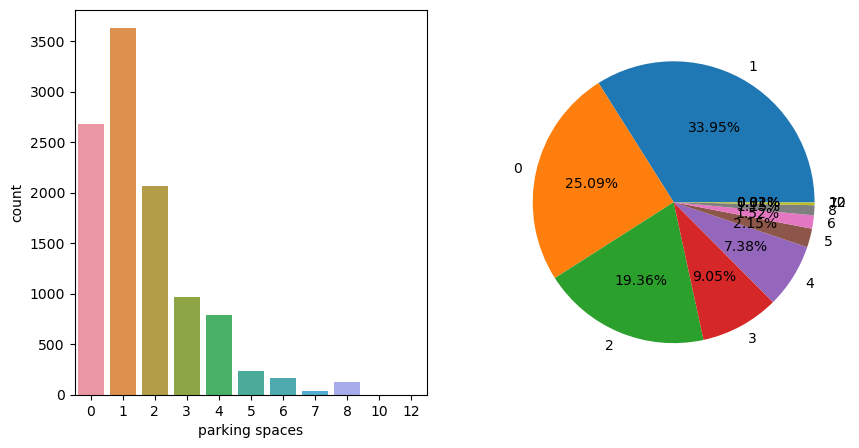

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x = "parking spaces", data = data, ax = ax[0])
mar = (data["parking spaces"].value_counts())
labels = list(data["parking spaces"].value_counts().index)
plt.pie(mar, labels =labels,autopct= "%0.2f%%" )
plt.show()

# interpretation: As per my research avg brazilian own atleast 1 car so we have so see which client doesn't own a car and then which house doesn't have a car parking we have to show the homes according to it

# floor analysis

In [18]:
cat("floor")

Unique values in floor are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode of floor is 0
Number of missing values in floor is 0


<AxesSubplot:xlabel='floor', ylabel='count'>

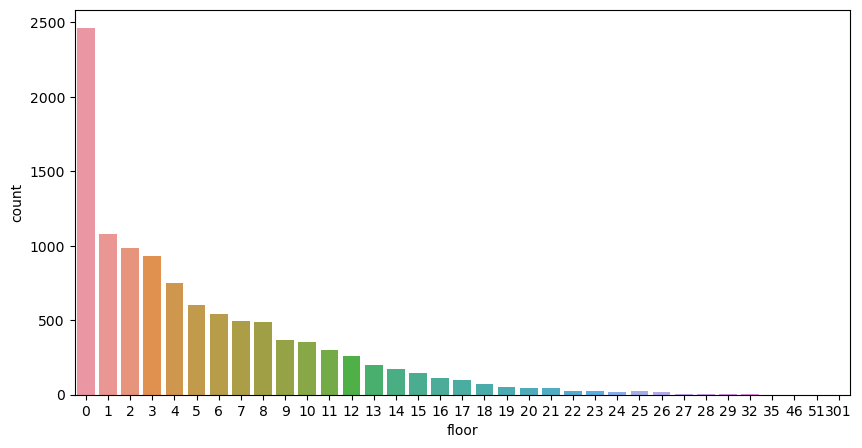

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x = "floor", data = data)

# interpretation: we have a wide range of floors available but maximum houses are ground floors 

# animal analysis

In [20]:
cat("animal")

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


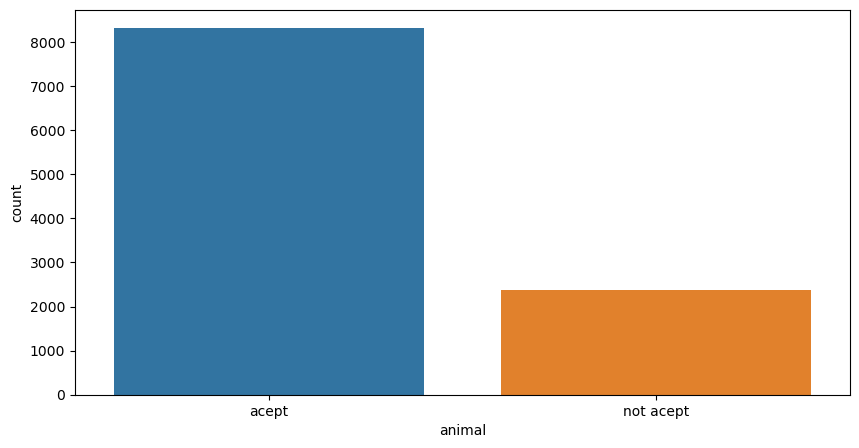

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x = "animal", data = data)
plt.show()

# interpretation: maximum houses acepts the pets 

# furniture analysis

In [22]:
cat("furniture")

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


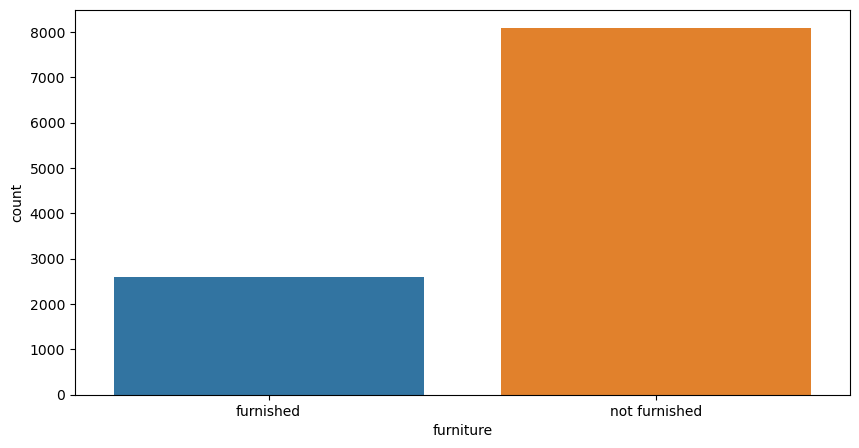

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x = "furniture", data = data)
plt.show()

# interpretation: maximum houses are not furnished it can lead to cheaper rent and more opportunity to customize according to clients need 

In [24]:
continuous

['area',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [25]:
def num(col):
    print(f"The mean of the {col} is {data[col].mean()}")
    print(f"The median of the {col} is {data[col].median()}")
    print(f"The mode of the {col} is {data[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {data[col].std()}")
    print(f"The skewness of the {col} is {data[col].skew()}")
    print(f"Number of missing values in the {col} is {data[col].isnull().sum()}")

# area analysis

In [26]:
data["area"]

0         70
1        320
2         80
3         51
4         25
        ... 
10687     63
10688    285
10689     70
10690    120
10691     80
Name: area, Length: 10692, dtype: int64

In [27]:
num("area")

The mean of the area is 149.21791994014217
The median of the area is 90.0
The mode of the area is 50
The standard deviation of the area is 537.0169423364867
The skewness of the area is 69.5968036883111
Number of missing values in the area is 0


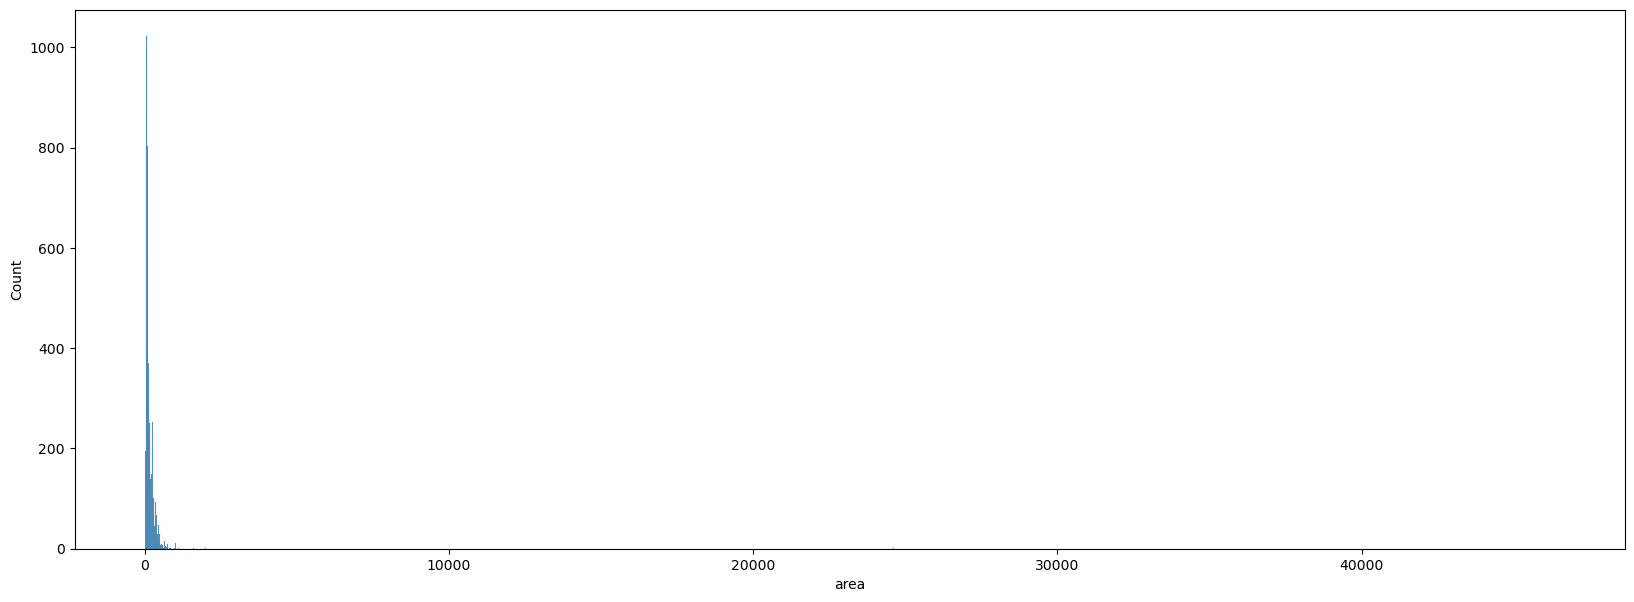

In [28]:
fig, ax = plt.subplots(figsize= (20, 7))    
sns.histplot(x = "area", data = data)
plt.show()

In [29]:
new_area =data[data["area"]<=500]
new_area

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


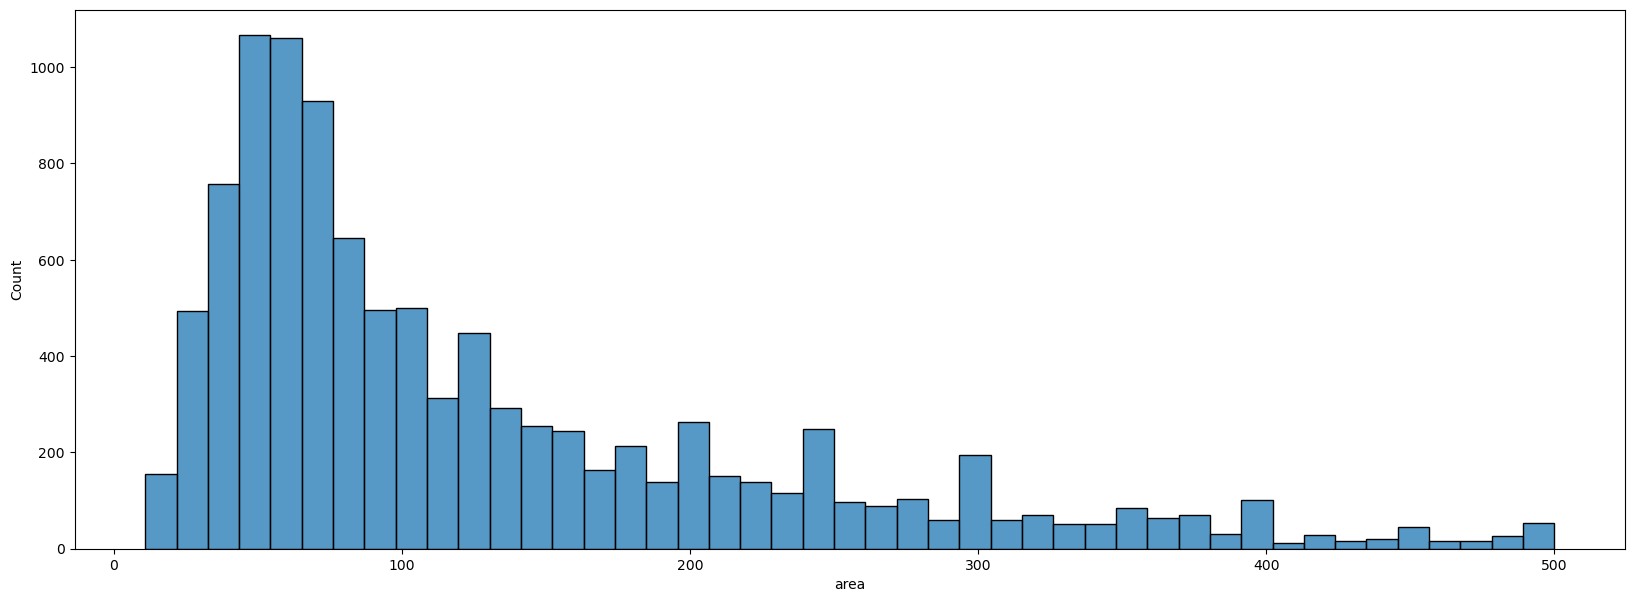

In [30]:
fig, ax = plt.subplots(figsize= (20, 7))    
sns.histplot(x = "area", data = new_area)
plt.show()

# interpretation: we have wide range of area wise house available but as per my study 120 square meters is the avg area that people live in

# hoa analysis

In [31]:
num("hoa (R$)")

The mean of the hoa (R$) is 1174.0216984661429
The median of the hoa (R$) is 560.0
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 15592.305248403356
The skewness of the hoa (R$) is 69.03938118910439
Number of missing values in the hoa (R$) is 0


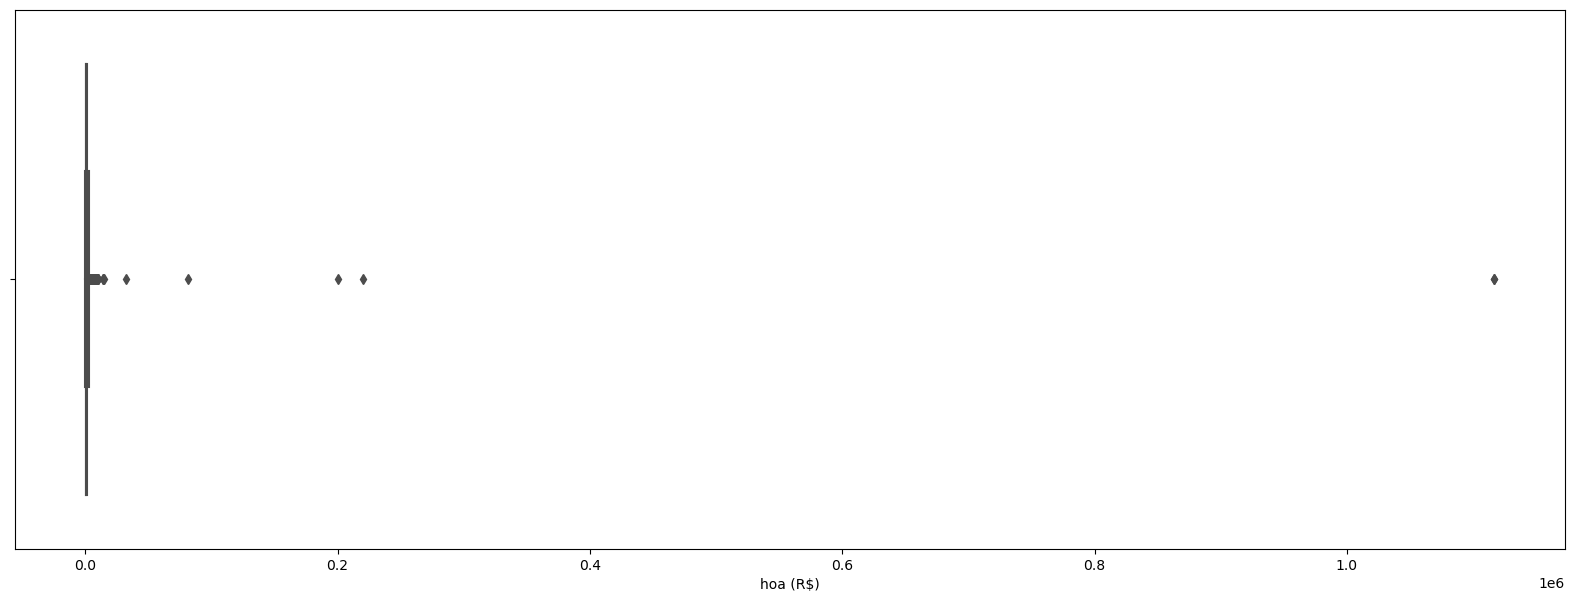

In [32]:
fig, ax = plt.subplots(figsize= (20, 7))               
sns.boxplot(x = data["hoa (R$)"], color = "r")
plt.show()

# interpretation: their are outliers in the in the hoa tax amount and those outliers can count under luxury categories of houses

In [33]:
new_amount = data[data["hoa (R$)"]<10000]
new_amount

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


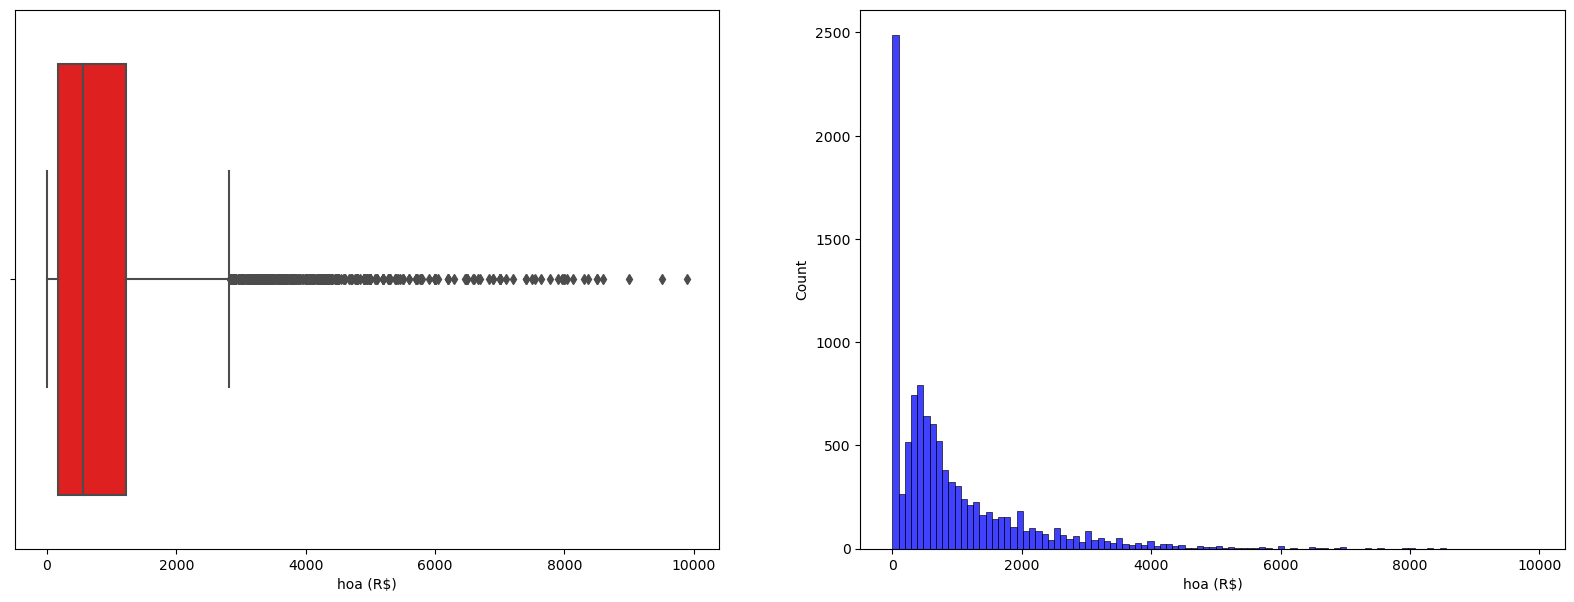

In [34]:
fig, ax = plt.subplots(1,2 ,figsize= (20, 7))               
sns.boxplot(x = new_amount["hoa (R$)"],ax = ax[0], color = "r")
sns.histplot(x = new_amount["hoa (R$)"], ax =ax[1], color = "b") 
plt.show()

# interpretation: their are outliers still but we can see that after 2,000 BRL the house owner tax does goes down

# rent amount (R$) analysis

In [35]:
num("rent amount (R$)")

The mean of the rent amount (R$) is 3896.247194163861
The median of the rent amount (R$) is 2661.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3408.5455176710816
The skewness of the rent amount (R$) is 1.8388773035440982
Number of missing values in the rent amount (R$) is 0


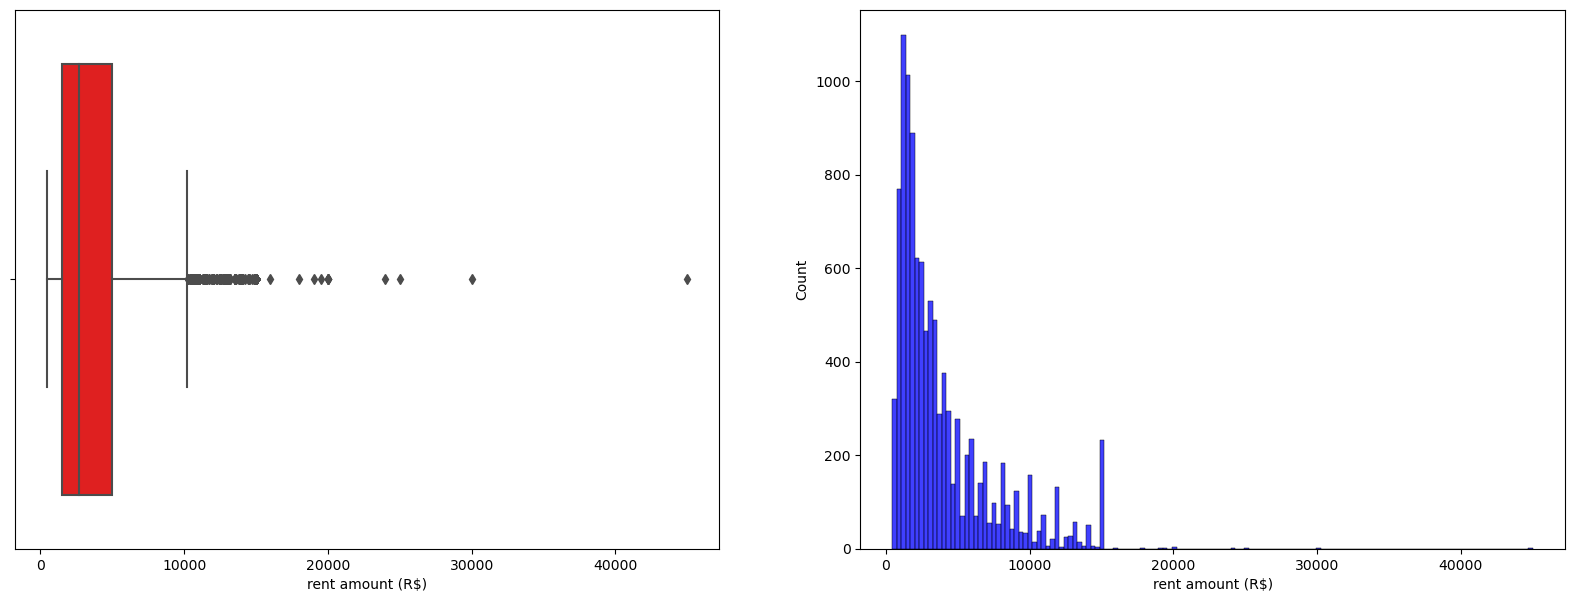

In [36]:
fig, ax = plt.subplots(1,2 ,figsize= (20, 7))               
sns.boxplot(x = new_amount["rent amount (R$)"],ax = ax[0], color = "r")
sns.histplot(x = new_amount["rent amount (R$)"], ax =ax[1], color = "b") 
plt.show()

In [37]:
new_rent = data[data["rent amount (R$)"]<15000]
new_rent

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


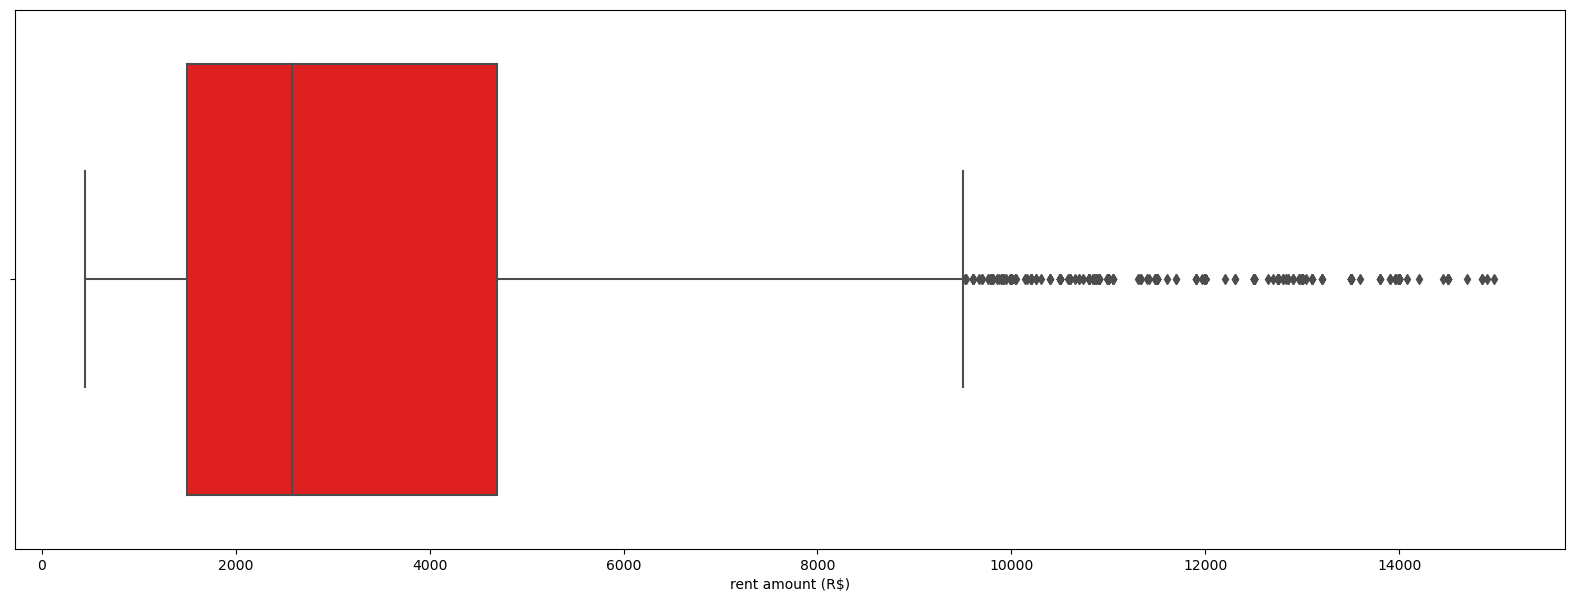

In [38]:
fig, ax = plt.subplots(figsize= (20, 7))               
sns.boxplot(x = new_rent["rent amount (R$)"], color = "r") 
plt.show()

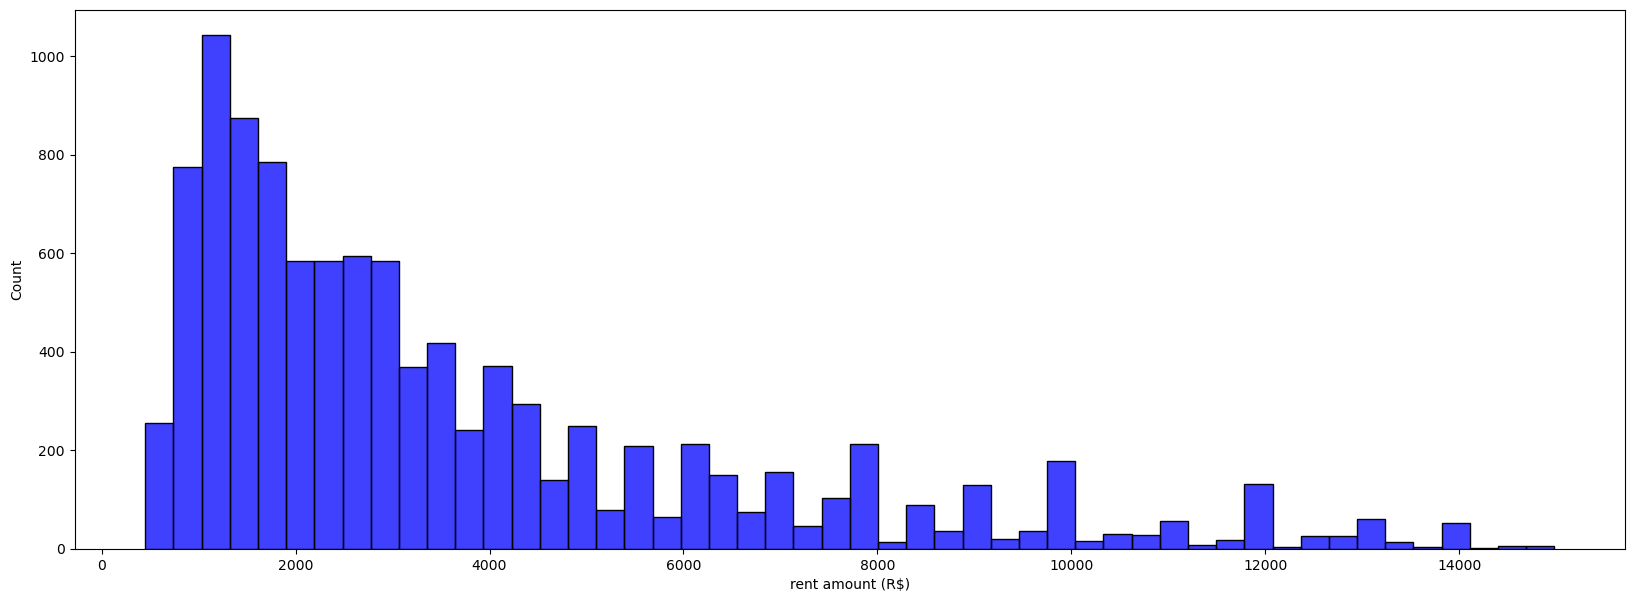

In [39]:
fig, ax = plt.subplots(figsize= (20, 7))  
sns.histplot(x = new_rent["rent amount (R$)"], color = "b")
plt.show()

# interpretation: almost all range of house are avaliabe but the range of 1,400 to 3,800 BRL is the hotspot amount
## according to my study the range of rent that most people in brazil prefer was 3,920 BRL – 12,080 BRL so i am taking 15,000 BRL for safty 

# property tax (R$) analysis 

In [40]:
num("property tax (R$)")

The mean of the property tax (R$) is 366.70435839880287
The median of the property tax (R$) is 125.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3107.832321161917
The skewness of the property tax (R$) is 96.01359410694417
Number of missing values in the property tax (R$) is 0


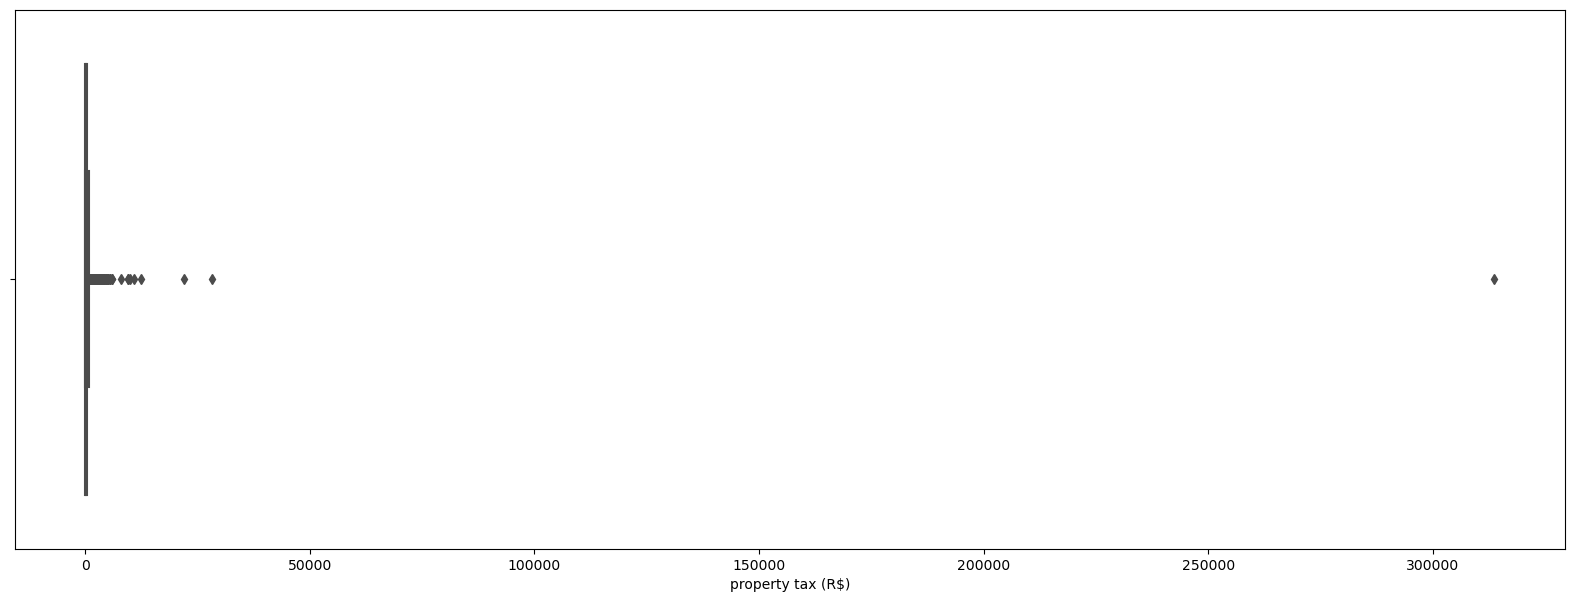

In [41]:
fig, ax = plt.subplots(figsize= (20, 7))               
sns.boxplot(x = new_rent["property tax (R$)"], color = "r") 
plt.show()

In [42]:
new_tax = data[data["property tax (R$)"]<=3107]
new_tax

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


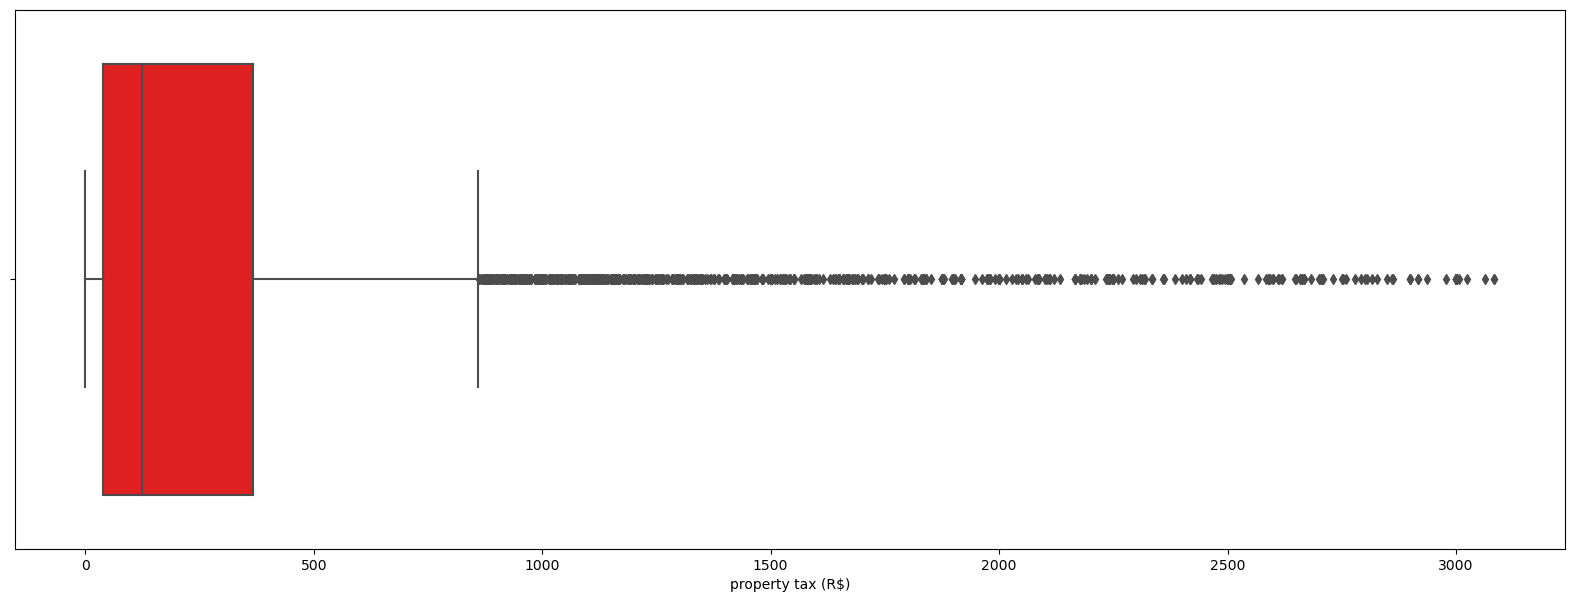

In [43]:
fig, ax = plt.subplots(figsize= (20, 7))               
sns.boxplot(x = new_tax["property tax (R$)"], color = "r") 
plt.show()

# interpretation: the avg property tax is 366 BRL and goes upto 7,000 to 9,000 BRL the remaning are the outliers 

# fire insurance (R$) analysis

In [44]:
num("fire insurance (R$)")

The mean of the fire insurance (R$) is 53.300879161990274
The median of the fire insurance (R$) is 36.0
The mode of the fire insurance (R$) is 16
The standard deviation of the fire insurance (R$) is 47.768030930197206
The skewness of the fire insurance (R$) is 1.9703997562081081
Number of missing values in the fire insurance (R$) is 0


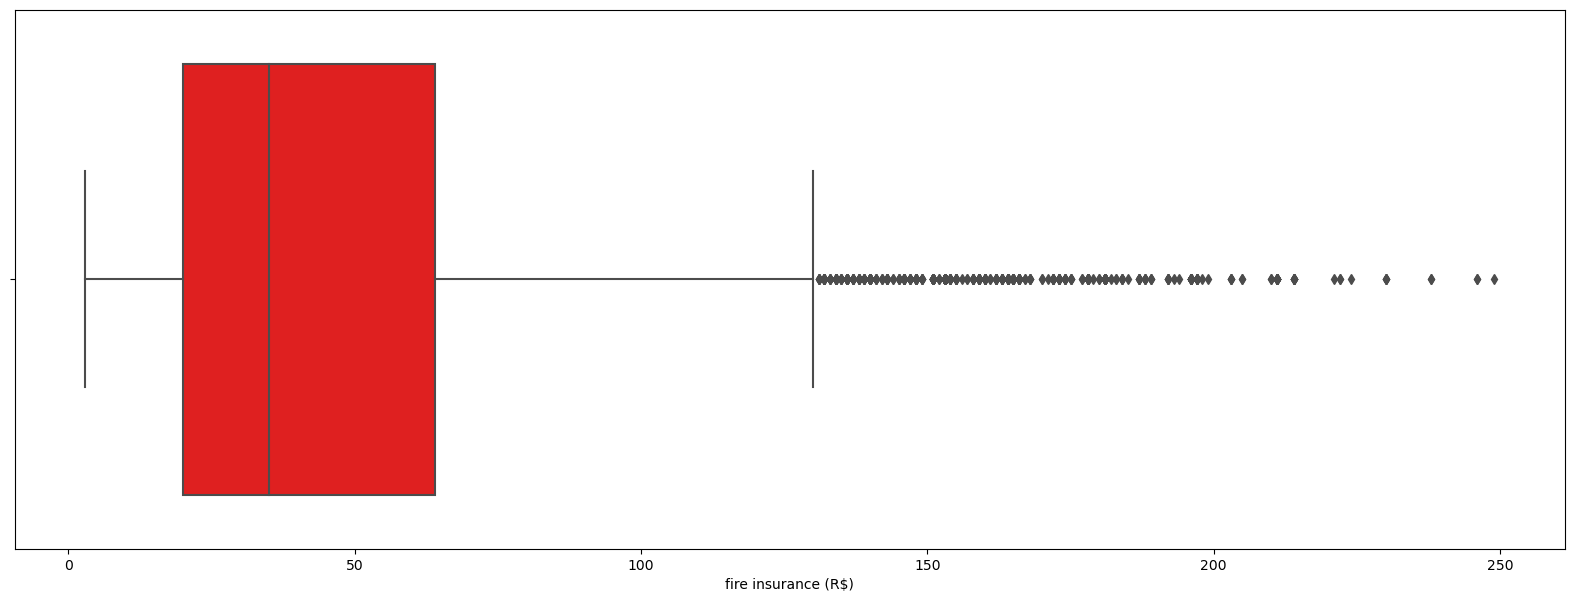

In [45]:
fig, ax = plt.subplots(figsize= (20, 7))               
sns.boxplot(x = new_rent["fire insurance (R$)"], color = "r") 
plt.show()

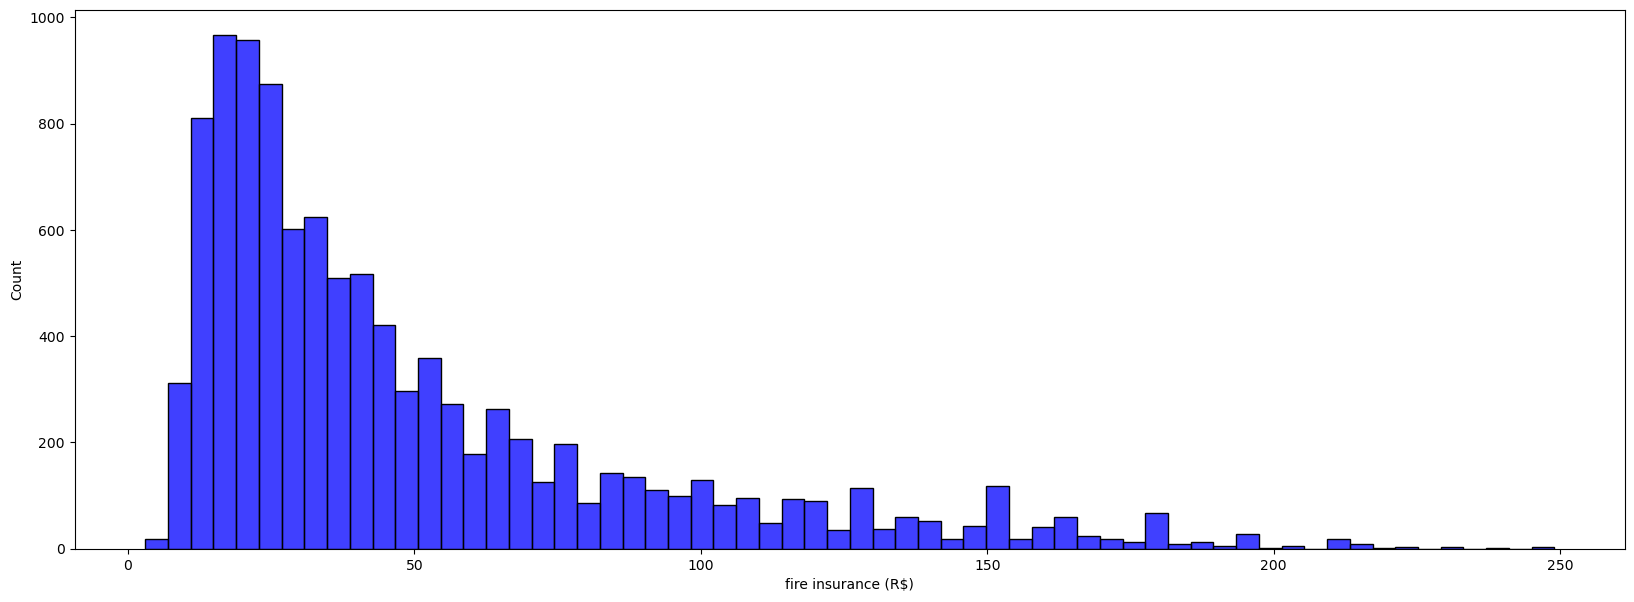

In [46]:
fig, ax = plt.subplots(figsize= (20, 7))  
sns.histplot(x = new_rent["fire insurance (R$)"], color = "b")
plt.show()

# interpretation: the avg fire insurance is 53 BRL and goes upto 250 BRL but the maximum number of people pay only 16 to 36 BRL for fire inscurance in upcomming analysis we can ignore the fire insurance because it does'nt effect the overall renting decision 

# total (R$) analysis

In [47]:
num("total (R$)")

The mean of the total (R$) is 5490.4869996258885
The median of the total (R$) is 3581.5
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 16484.72591235027
The skewness of the total (R$) is 58.96080291866255
Number of missing values in the total (R$) is 0


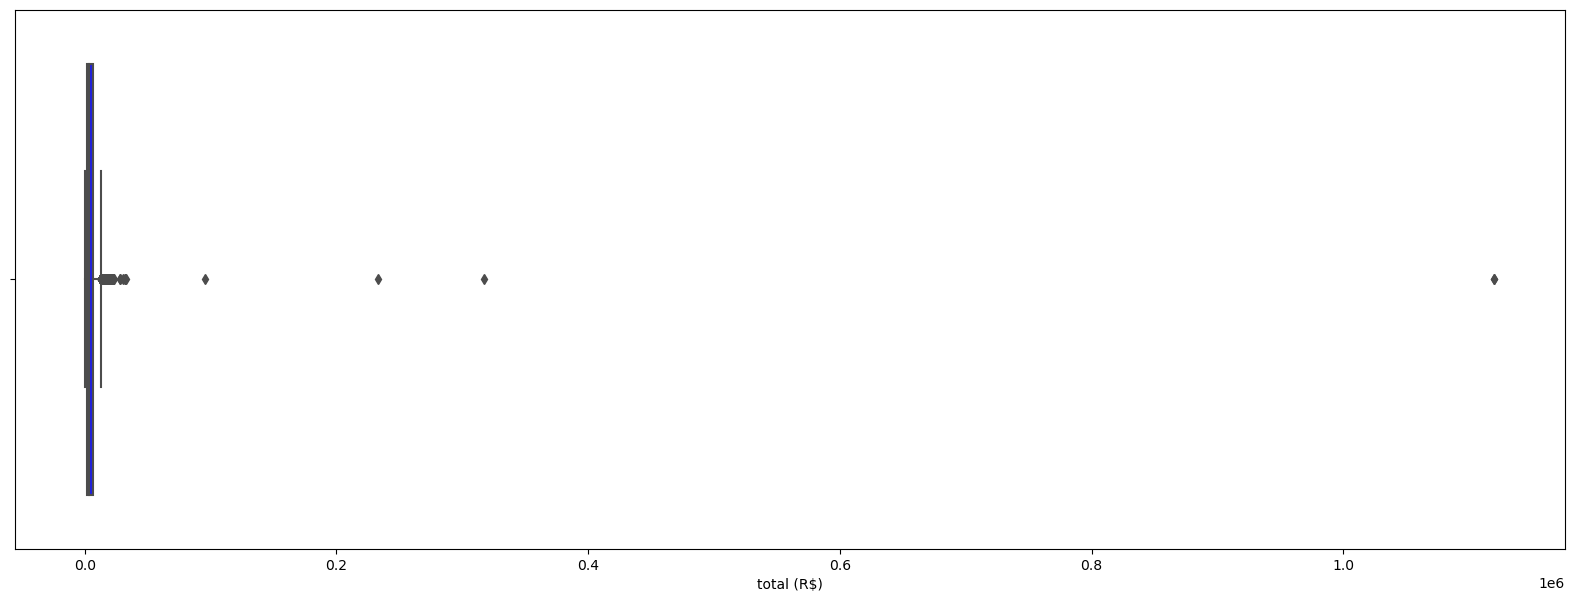

In [48]:
fig, ax = plt.subplots(figsize= (20, 7))  
sns.boxplot(x = new_rent["total (R$)"], color = "b")
plt.show()

In [49]:
new_total = data[data["total (R$)"]<=16484] 
new_total

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


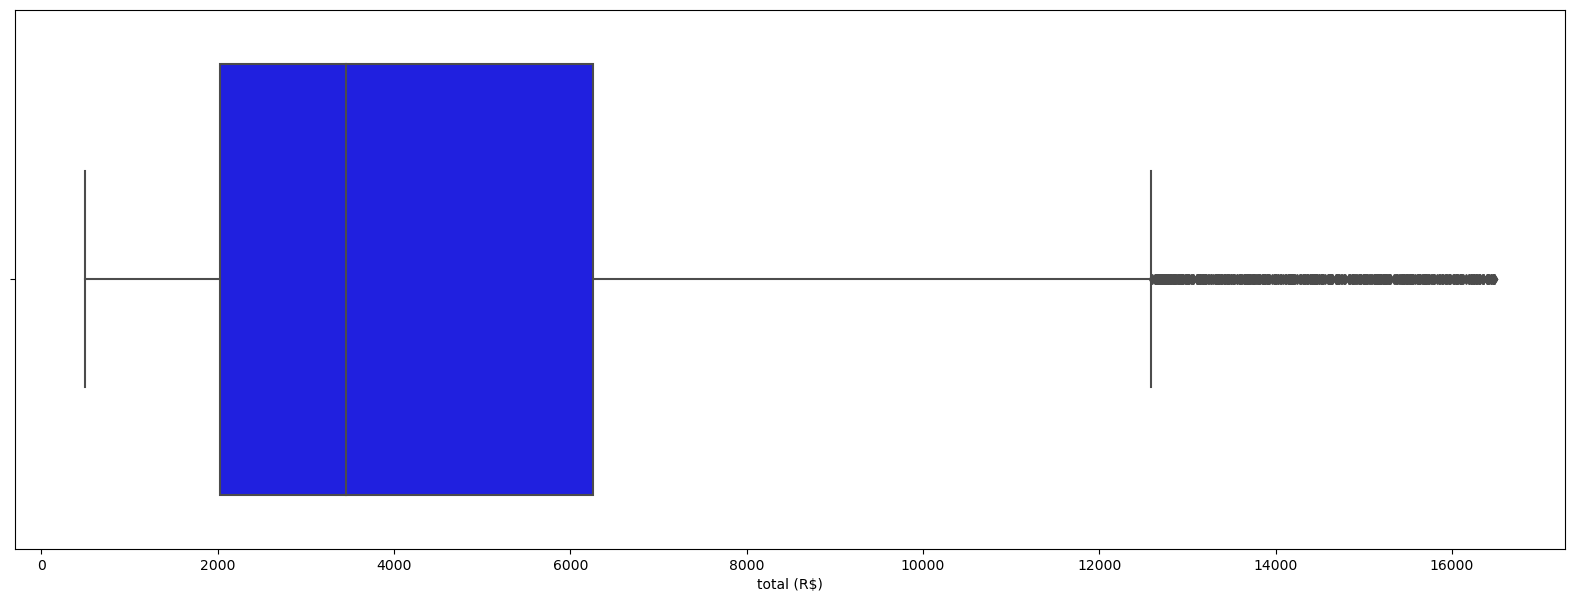

In [50]:
fig, ax = plt.subplots(figsize= (20, 7))  
sns.boxplot(x = new_total["total (R$)"], color = "b")
plt.show()

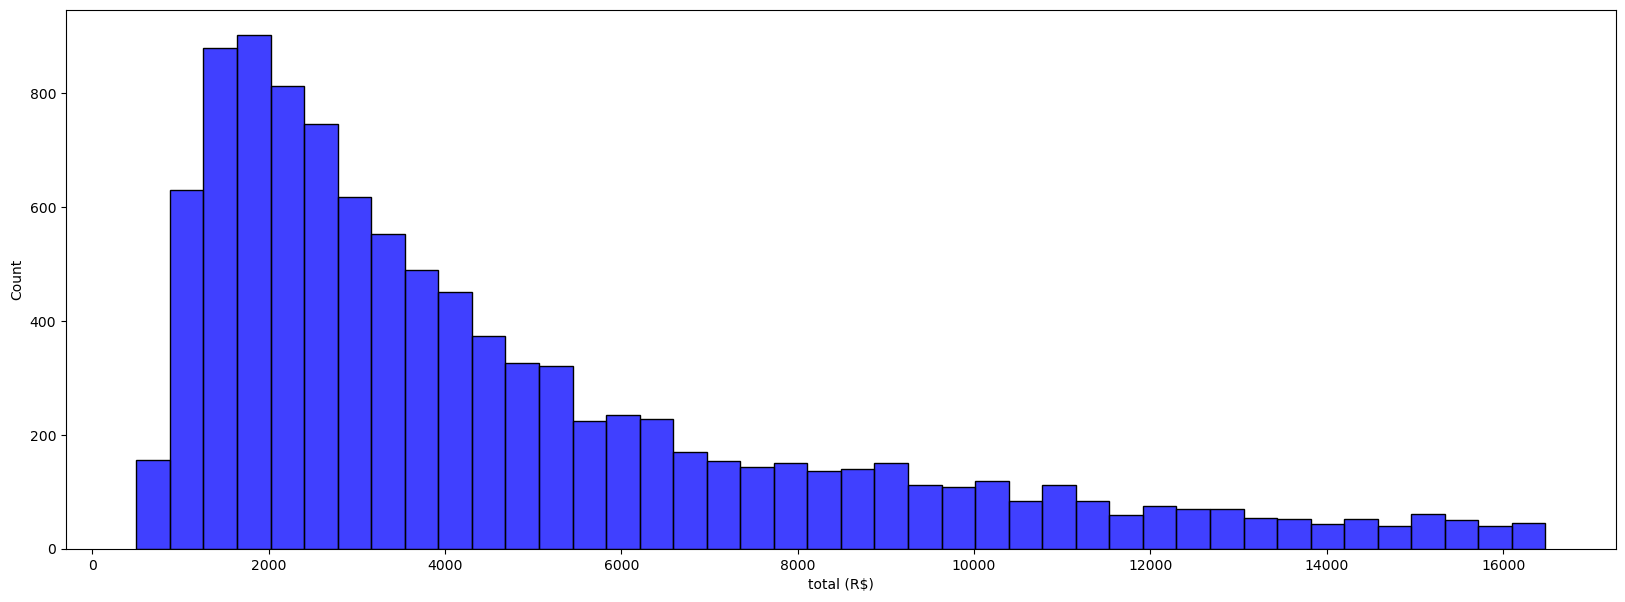

In [51]:
fig, ax = plt.subplots(figsize= (20, 7))  
sns.histplot(x = new_total["total (R$)"], color = "b")
plt.show()

# interpretation: most houses are around in the range of 2,000 to 6,000 BRL and goes upto 13,000 BRL and other are consider as be outliers 

# level 2

### observation : their are many outliers specially in the numerical columns so i am considering to filter out the data first then select the important columns then do further analysis

In [52]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [53]:
new_table = data[(data["total (R$)"]<=16484) & (data["property tax (R$)"]<=3107) & (data["rent amount (R$)"]<15000) & (data["area"]<=400) & (data["parking spaces"]>=1)] 
new_table

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,São Paulo,280,4,4,2,5,acept,not furnished,4200,4000,1042,51,9293
10685,São Paulo,83,3,2,2,11,acept,not furnished,888,7521,221,96,8726
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926


### observation2 : choosing the important columns which will help us in further analysis
## 1) rooms
## 2) rent amount / total amount
## 3) area

### this 3 columns will be analyse with city to find out the best city for 3 category of clients  

# 1) bachelor 2) mid size families 3) large size families

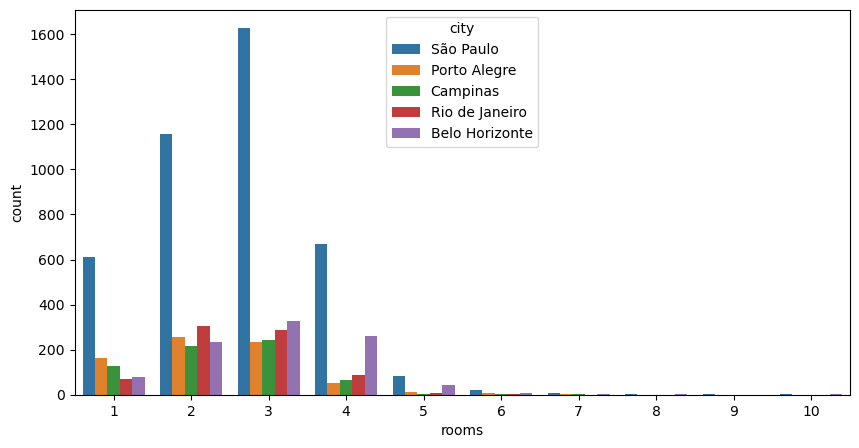

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x = "rooms",hue = "city", data = new_table)
plt.show()

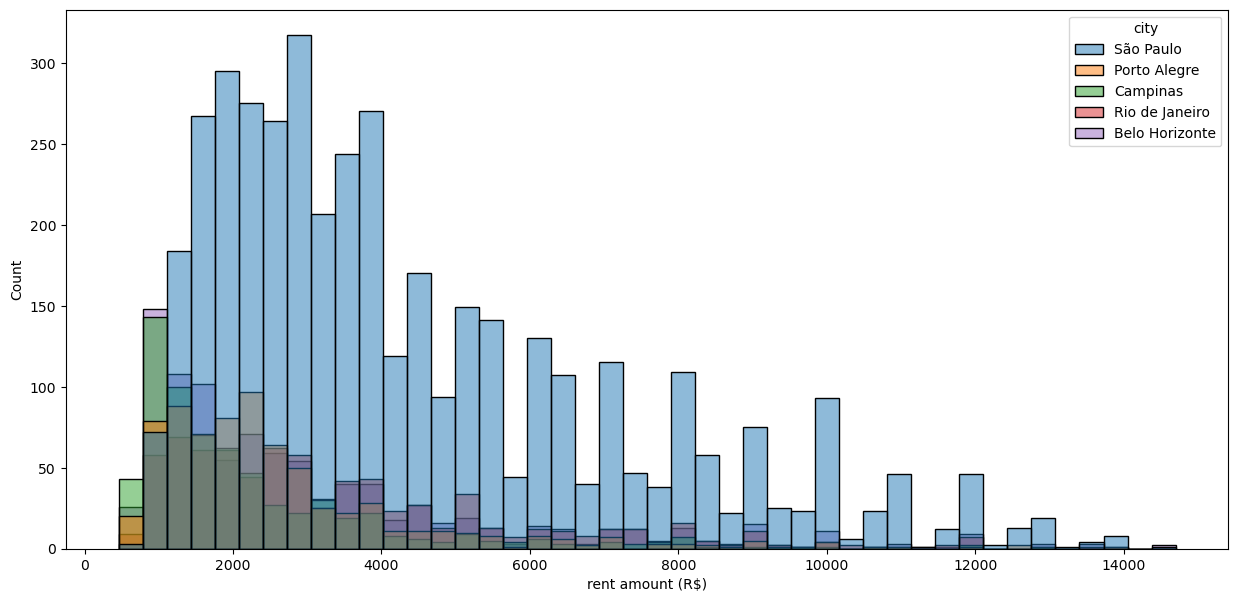

In [55]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.histplot(x = new_table["rent amount (R$)"], hue = new_table["city"])
plt.show()

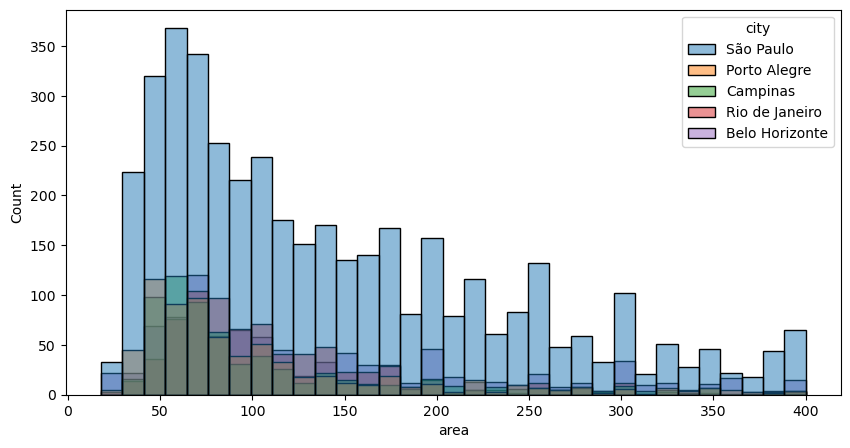

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x =new_table["area"],hue = new_table["city"], data = new_table)
plt.show()

# level 3

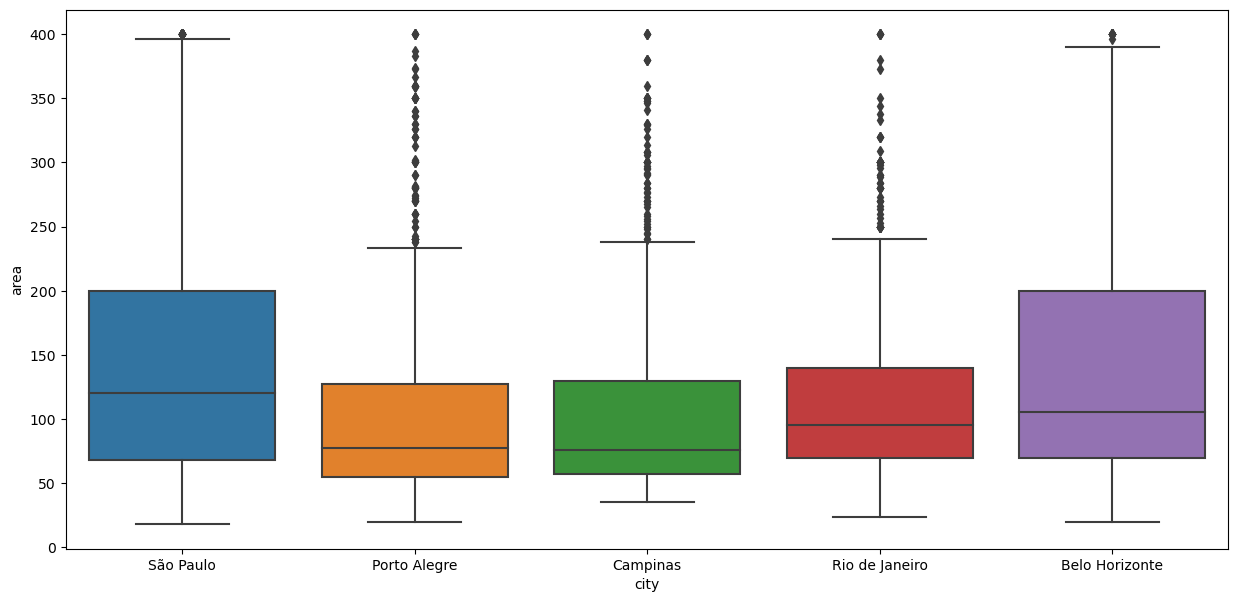

In [62]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.boxplot(x = new_table["city"], y = new_table["area"])
plt.show()

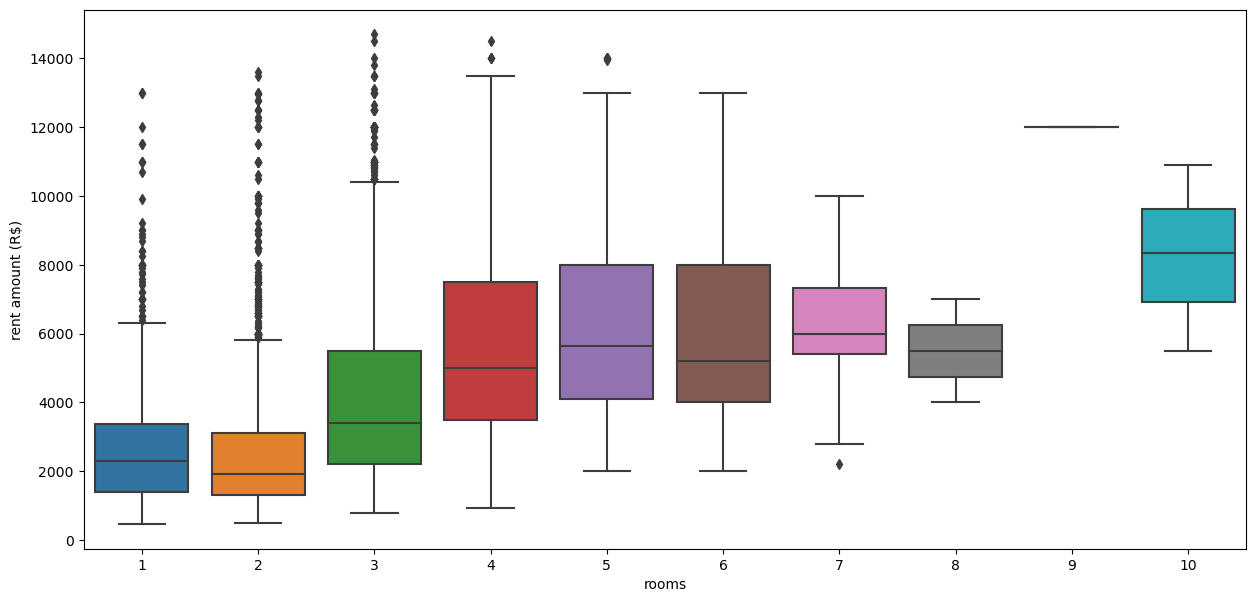

In [58]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.boxplot(x = new_table["rooms"], y = new_table["rent amount (R$)"])
plt.show()

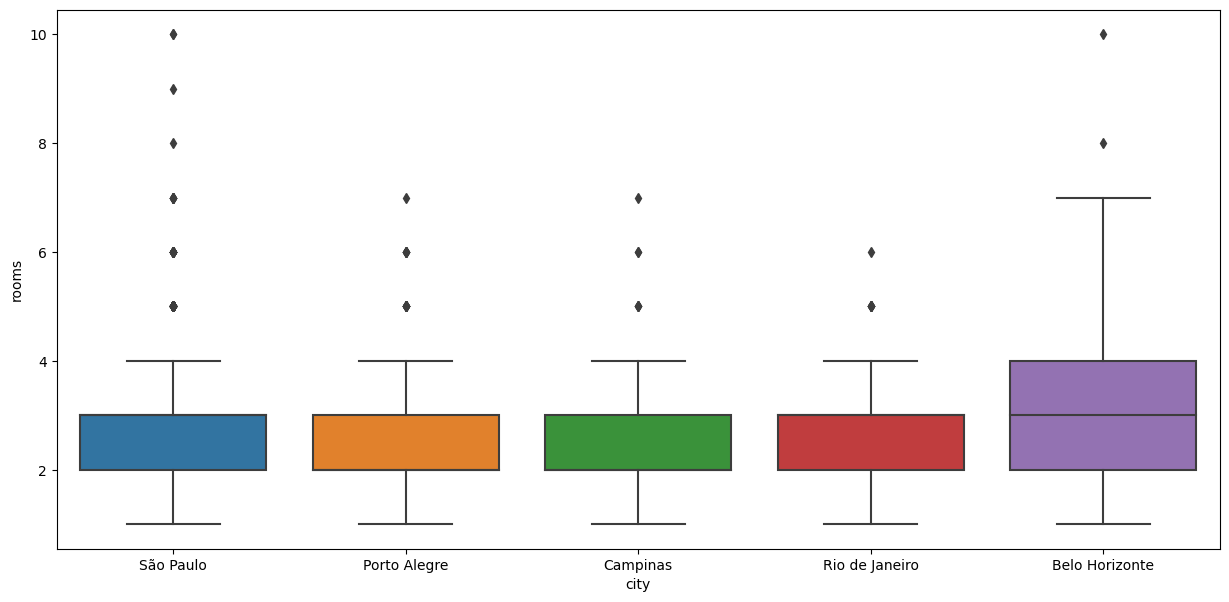

In [59]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.boxplot(x = new_table["city"], y = new_table["rooms"])
plt.show()

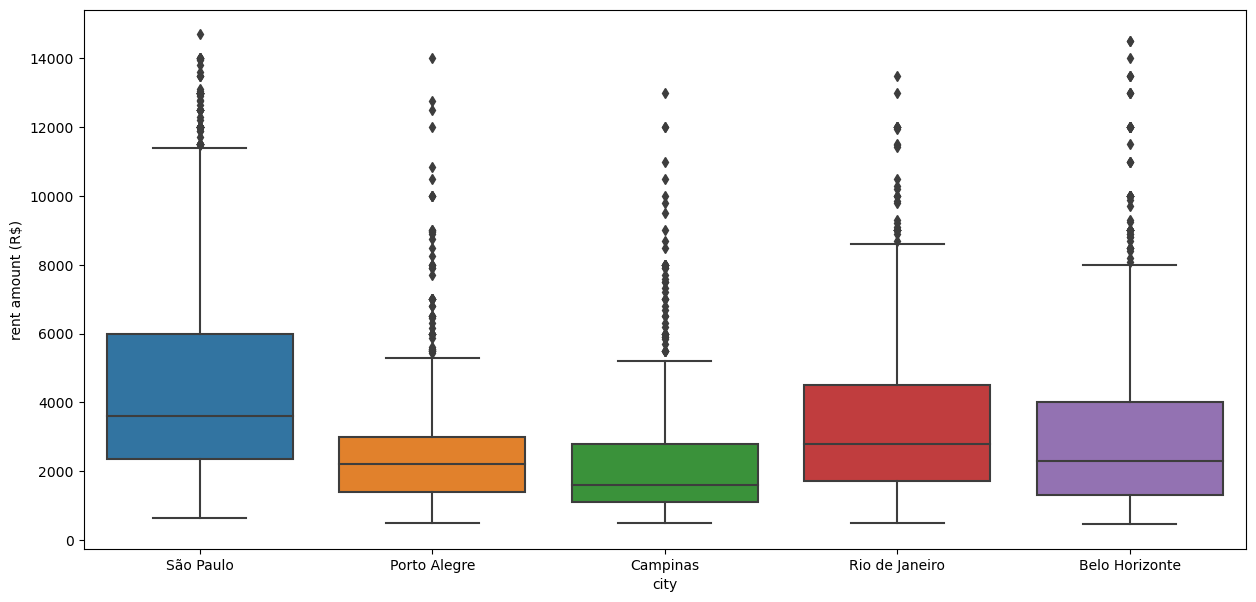

In [60]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.boxplot(x = new_table["city"], y = new_table["rent amount (R$)"])
plt.show()

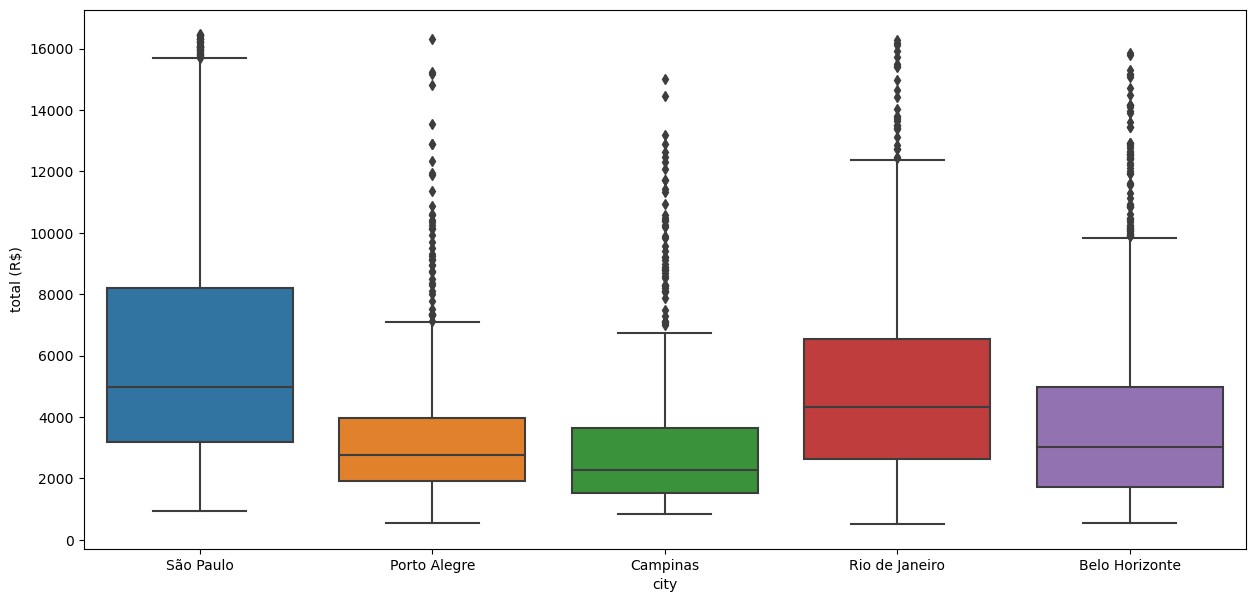

In [61]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.boxplot(x = new_table["city"], y = new_table["total (R$)"])
plt.show()

# extra info about city 

### 1. sao-paulo - utilities are expensive busy city life traffic and not near a coatal area but coast is near by in 1 hour drive,---- quality of life - 4, friendly to outsiders, cafes, family friendly areas 
### 2. rio - crimes, traffic,--- quality of life - 4
### 3. Porto Alegre - less female friendly, not much english speaking people, crimes,--  quality of life - 3.7
### 4. Campinas - not much places to hangout and crimes ,--- quality of life - 3.5
### 5. Belo Horizonte - bad infrastructure and drug dealing and crimes rates are higher,--- quality of life - 3.5

## conclusion : for batchlors i recommend rio de janeiro city 
## because of less expensive rent compare to sao paulo 
## also great quality of life and nightlife a person can spend 
## around 3000 to 4500 BRL on rent for decent house,
## for mid size and large size famalies i recommend sao paulo 
## because of more family friendly better neighborhoods and 
## wide range of houses to renting according to their needs 3500 - 6000 BRL 
## and if someone wants to save money and need a decent place to live in brazil
## so i recommend porto alegre. rent range in brazil is 3,920 BRL – 12,080 BRL 
## An estimated monthly cost for a family of four in Brazil is 2700dollars
## which is 13288.59 BRL includes rent,food,entertainment,commute and extra activities.

## CONCLUSION 2: FOR DIGITAL NOMAD WHO WANTS TO WORK FROM ANYWHERE SO RIO CITY IS MY  RECOMMENDATION